# Entrega - Tarea 2

### Grupo 2:
     - Darío Rosa 3813883-9
     - Diego Aleman 4952936-0
     - Gabriel Kryger 4933558-9



## 1. Objetivo

El objetivo de esta tarea es construir un clasificador utilizando el Algoritmo ID3 en su variante que permite el manejo de atributos continuos.
Para medir el éxito del aprendizaje vamos a utilizar las medidas accuracy, precision, recall y medida F1, utilizando para su cálculo la librería sklearn. 

## 2. Diseño

### 2.1 Preprocesamiento de datos
Al inicio es necesario pre procesar los datos que fueron entregados en el laboratorio, para que cumplan con algunas condiciones que nos faciliten su procesamiento.

### 2.1.1 Tratamiento de los valores textuales
Haciendo un análisis de los atributos contenidos es el DataSet, vimos que no tenemos atributos textuales de texto libre, solo valores textuales que representan valores discretos. 
Para la ejecución de nuestro algoritmo se necesitó asociar todos los valores textuales a valores reales. Esto se hizo tomando todos los valores posibles (sin contar indefinidos o equivalentes) y, a cada valor textual asociándoles un valor natural de forma incremental. Para este contexto creemos que no es necesario la aplicación de algoritmos como el de OneHotEncoding porque nuestro algoritmo no va a hacer ninguna operación sobre estos reales, solo los va a tratar como números discretos.

### 2.1.2 Tratamiento de valores reales, discretización
En el caso de valores reales continuos, se busca discretizar los valores reales. En nuestro caso no vamos a realizar este tratamiento en el pre-procesamiento sino que dentro del algoritmo mismo.




### 2.1.2 Tratamiento de valores reales, discretización
En el caso de valores reales continuos, se busca discretizar los valores reales. En nuestro caso no vamos a realizar este tratamiento en el preprocesamiento sino que dentro del algoritmo mismo.


### 2.1.4 Tratamiento de valores faltantes
En el caso de que hubiera valores faltantes en una fila, se tomó la decisión de, en caso de que el valor sea real, asociarle a esta celda el valor promedio de la columna. 

Nuestro algoritmo no contempla que hacer, en caso de que haya celdas faltantes en una columna textual, se toma el desconocimiento como un posible valor.
Para el caso de las columnas textuales, encontramos que solamente la columna "smoking_status" toma celdas faltantes con el valor "Unknown". Tomamos la decisión de no suplirlos con ningún tipo de técnica (ya sea tomando el valor más común o asignando un valor según la probabilidad del resto) y utilizar el valor "Unknown" como un valor válido. Esta decisión fue tomada, ya que la cantidad de valores "Unknown" es muy elevada y al suplir este valor con otro, es seguro que esto genere tuplas con ejemplos erróneos que lleven a que el árbol aprenda a clasificar correctamente los mismos, que lo inducen a clasificar erróneamente ejemplos del dominio.

Cabe destacar que este reemplazo de datos faltantes es implementado luego de la separación de los conjuntos de entrenamiento y evaluación y solo en el conjunto de entrenamiento, así no afectar la realidad al momento de evaluar el algoritmo. A diferencia del algoritmo sklearn, nuestro clasificador permite la evaluación con atributos faltantes, simplemente retornaremos el valor más común de "stroke".

### 2.1.5 Tratamiento del desbalance en el muestreo
El algoritmo que se pidió implementar deberá de tener como resultado la probabilidad de tener una condición, en nuestro caso la probabilidad de haber tenido un infarto, por lo tanto, para evitar un bias en las respuestas del algoritmo es necesario equiparar la cantidad de resultados positivos y negativos en nuestros datos de entrenamiento. 
El conjunto enviado se encuentra muy desbalanceado, teniendo muchos casos negativos y muy pocos positivos, esto va a afectar mucho el resultado y el entrenamiento de nuestro clasificador. Para el balanceo de estos datos vamos a usar Oversample y así obtener una muestra más distribuida de casos positivos y negativos.

### 2.1.6 Tratamiento de los valores fuera de la realidad

En caso de que en el que los datos haya columnas las cuales no sean relevantes en la realidad observada, por ejemplo en nuestro caso el ID, no se tomaran en cuenta a la hora de realizar el algoritmo, ya que esto podría llevar a un sobre ajuste.

### 2.1.7 División de conjuntos
Hicimos la separación de conjuntos en conjunto de entrenamiento y conjunto de validación en un 80% - 20%, ya que es la proporción recomendada. No hicimos separación de conjunto de test, ya que creemos que el objetivo de este laboratorio es la de realizar muchas evaluaciones y aprovechar toda la cantidad posible de ejemplos para el entrenamiento.


## 2.2 Algoritmo
Para la creación del clasificador y como fue solicitado en la letra del laboratorio, fue implementado el árbol de decisión utilizando el algoritmo ID3 dado en el teórico, con la variante de atributos continuos. Pero antes de continuar con su implementación vamos a detallar otras funcionalidades que fueron necesarias.

### 2.2.1 Información de atributos
Fue implementada una función llamada "GetFullColumnDescriptor" que retorna un diccionario con información necesaria para el algoritmo ID3, entre ellas:
- Nombre del Atributo
- Si su valor es real, continuo o discreto (discreto = true)
- Listado con sus valores posibles (basándonos en el conjunto de datos)

En el caso de atributos con valores continuos, en la lista de posibles valores, retornamos un solo valor que es el seleccionado como división de los valores en dos intervalos. (la selección de este valor, será explicado más adelante)

### 2.2.2 Cálculo de Ganancia
En el árbol generado por el algoritmo ID3, tiene un gran impacto en el performance la buena selección del atributo en cada paso de la recursión, para esta elección calculamos la "ganancia":

$$
Ganancia(S,A) = 1 - \sum \limits _{v \in Val(A)} \frac{|Sv|}{|S|}.Entropía(sv)
$$

Donde 
- Entropía(sv): Es la entropía teniendo en cuenta solo los ejemplos con el valor $v{_i}$ en el atributo $A$

### 2.2.3 Selección del "mejor" atributo en el paso recursivo

En nuestra solución, esta selección de atributos fue implementada en la función
"GetBestAtt" que recibe un DataFrame con los datos y la información de todos los atributos, retornando el mejor atributo para la recursión, que en nuestro caso será aquel con mayor ganancia.
La función "GetAttGanancia" calcula dicha ganancia teniendo en cuenta si el atributo es continuo o discreto.

**Atributos Discretos:** Para el cálculo de la ganancia para un atributo, simplemente calculamos su ganancia utilizando la fórmula presentada anteriormente y obteniendo los posibles valores de la función "GetFullColumnDescriptor".

**Atributos Continuos:** En el caso de atributos con valores continuos, vamos a usar el valor seleccionado en la función "GetFullColumnDescriptor" donde es seleccionado un valor Real que es el que particióna el rango de valores del atributo en dos intervalos que maximizan su ganancia. Para obtener este valor seguimos los siguientes pasos:

- Ordenamos los datos en forma ascendente por el atributo a estudio. (DataFrame original, ya que se implementa en la función "GetFullColumnDescriptor")
- Analizamos los valores del atributo, donde el atributo Stroke cambia de valor.
- Para estos valores calculamos la ganancia de dicha partición teniendo en cuenta la siguiente fórmula:
 
 $$
    Ganancia(v{_i}) = 1 - Ganancia(V(S)<=v{_i}) - Ganancia(V(S)>v{_i})
 $$

Por lo tanto, al en cada paso de la recursión el algoritmo va a seleccionar el atributo que tiene mayor Ganancia.

### 2.2.4 Descripción general del algoritmo
Nuestra solución tuvimos que modificar algunas sentencias del algoritmo básico dado en el teórico. El árbol de decisión es credo en la función "ID3_DecisionTree", que recibe como parámetro el DataFrame de entrenamiento y el tamaño máximo de profundidad del árbol.
A continuación un pseudocódigo de nuestro algoritmo: 

1. Analizamos los retono de los casos base
  - Si el parámetro maxlevels es cero, significa que llegamos al máximo de niveles permitidos. En este caso retornamos una hoja (tipo G02TreeSheet) con la moda del atributo "stroke" como resultado.
  - Si todos los ejemplos tienen el mismo valor en el atributo "stroke", retornamos una hoja con el valor de "stroke" .
  - Si el conjunto de ejemplos recibidos por parámetro tiene solo la columna "stroke", retornamos la moda de ese atributo. 

2. Seleccionamos el mejor atributo (idColumn)
3. Creo un objeto de la clase "G02Tree" que usaremos como retorno
4. Analizamos si el atributo es discreto:

  4.1 Por cada valor permitido, Obtengo el conjunto de ejemplos con ese valor y ejecutamos el llamado recursivo a la función con los ejemplos y maxLevels-1.
  4.2 Agregamos el árbol retornado por la llamada recursiva al árbol generado en el punto 3.

5. En el caso de que el atributo seleccionado sea continuo:

  5.1 Creamos un objeto de tipo G02TreeContNode con el valor seleccionado para la generación de los intervalos (Ver Sesión Selección del "mejor" atributo en el paso recursivo) y el atributo IsFirstSet en True, que indica te estamos creando la rama con los valores menores o iguales.
  5.2 Obtenemos los ejemplos con el valor del atributo menor o igual al de nuestra partición. Y ejecutamos la llamada recursiva con esos ejemplos y maxLevels-1
  5.3 Agregamos el resultado de esa llamada al árbol generado en el punto 3.
  5.4 repetimos los pasos 5.1, 5.2 y 5.3 pero teniendo en cuenta los ejemplos con los valores mayores al de nuestra partición.

6. Retornamos el árbol generado en el punto 3, con ya todos sus nodos internos.


## 2.3 Evaluación
Para la evaluación de los resultados, se utilizaron las métricas propuestas en la letra del laboratorio, utilizando el paquete Sklearn.metrics y las funciones: acc, precisión, recall y f1. También para la matriz de confusión utilizamos el paquete SkLear.metrics y confusion_matrix.

Para la separación de los conjuntos de entrenamiento y evaluación, también utilizamos la librería sklearn y la función train_test_split con una proporción de 80%-20% y random_state=42 para que los resultados sean reproducibles. 

En nuestra evaluación lo que hicimos fue a grandes rasgos:
1. Pre procesar los datos, convirtiendo los valores discretos a reales
2. Eliminamos el atributo "Id", ya que nos generaría un sobreajuste y no proporciona ninguna información útil en este contexto.
3. Separamos el conjunto de entrenamiento y el de evaluación en un 80% - 20%
4. Creamos nuestro árbol de decisión y evaluamos las métricas
5. Arreglamos los datos modificando su distribución haciendo oversampler.
6. Ejecutamos nuevamente los pasos 3 y 4 pero con los ejemplos balanceados.

Tal como lo propone la letra del laboratorio, hacemos una comparación con los resultados del algoritmo de sklearn DecisionTreeClassifier, de la misma manera que con nuestro algoritmo. No exactamente con los mismos ejemplos, pero si la misma metodología detallada anteriormente.

Para la visualización más adecuada del árbol de decisión resultante de nuestro algoritmo, creamos una función llamada "SaveId3Tree" que guarda nuestro árbol formateado en texto plano para poder analizar mejor lo que fue generado. En la carpeta de nuestra solución tenemos algunos ejemplos.

## 3. Experimentación
Para la experimentación, vamos a realizar los mismos pasos especificados en la sesión 2.3.

### 3.1 Carga de DataSet 
Lo primero que hacemos es levantar los datos del DataSet usando panda.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler as oversampler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
import math

#Carga de datos y prueba con sicklearn:
df = pd.read_csv(".\healthcare-dataset-stroke-data.csv")

### 3.2 Pre Procesamiento de los datos
Luego del análisis de los datos, tenemos que los siguientes atributos son de tipo texto, pero con valores discretos: ever_married, gender,work_type, Residence_type y smoking_status. Entonces procedemos a su reemplazo por valores discretos reales. También, como fue descrito anteriormente, eliminamos del conjunto de datos al atributo "id", ya que sería perjudicial para nuestro algoritmo.

In [5]:
#modificamos los enumerados a valores reales discretos
df['ever_married'] = df['ever_married'].replace(['Yes', 'No'], [1,0])
df['gender'] = df['gender'].replace(['Male', 'Female', 'Other'], [0,1,2])
df['work_type'] = df['work_type'].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], [0,1,2,3,4])
df['Residence_type'] = df['Residence_type'].replace(['Urban', 'Rural'], [1,0])
df['smoking_status'] = df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [0,1,2,3])
del df["id"] #el id no puede ir ya que hace sobreajuste


### 3.3 Separación de conjuntos y reemplazo valores nulos
Creamos una copia del DataFrame y hacemos una separación de los conjuntos de entrenamiento y conjunto de validación en un 80% - 20% con un random_state =42. Luego de esta separación, como parte del procesamiento reemplazamos los valores n/a del atributo "bmi" que es el único al que tenemos que procesar en este contexto.

In [6]:
dfGlobal = df.copy()
#1022 test size porque es el 20%, 5110 datos en total
df_train, df_test = train_test_split(dfGlobal, test_size=0.2, random_state=42)

#en el conjunto de entrenamiento, cambiamos los valores null por la media
media = df_train['bmi'].median()
df_train['bmi'] = df_train['bmi'].replace(['N/A'], [media])
df_train['bmi'] = df_train['bmi'].fillna(media)


### 3.4 Inicio de pruebas de nuestro algoritmo

Primero importamos nuestra lógica del clasificador y especificamos una función para la impresión de métricas:

In [23]:
import g02_l2_core
#funcion para imprimir las metricas
def PrintMetrics(Y_test, predict):
    print("Accuracy -> "+str(acc (Y_test, predict)))
    print("Precision -> "+str(precision (Y_test, predict)))
    print("Recall -> "+str(recall (Y_test, predict)))
    print("F1 -> "+str(f1 (Y_test, predict)))
    print("Matriz de Confusión:")
    tn, fp, fn, tp = confusion_matrix(Y_test, predict).ravel()
    print("      1        0")
    print(" 1    {:<8} {:<8} ".format(tp, fp))
    print(" 0    {:<8} {:<8} ".format(fn, tn))

#### 3.4.1 Prueba con 7 niveles
La primera prueba con un árbol de 7 niveles y datos desbalanceados

In [8]:
#Prueba con 7 niveles
maxTreeLevels = 4
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, maxTreeLevels)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = g02_l2_core.TestID3Tree(df_test, ID3_tree)
PrintMetrics(df_test['stroke'].values, predict)


Accuracy -> 0.9393346379647749
Precision -> 0.0
Recall -> 0.0
F1 -> 0.0
Matriz de Confusión:
      1        0
 1    0        0        
 0    62       960      


Vemos que en esta prueba el árbol tiene una generalización muy grande, lo que ocasiona que retorne en todos los casos false, ya que en su entrenamiento no llego a procesar datos con resultado verdaderos (ver G02_ID3_tree_7.txt).
Ya con esta prueba podemos ver la poca utilidad de la métrica Accurancy en este contexto, ya que nos retorna alrededor de un 93% de acierto, pero esto se debe a la mala distribución de los datos que ocasiona que la gran mayoría de los ejemplos son falsos.

#### 3.4.2 Prueba con más niveles
La Segunda prueba es con un árbol de 10 niveles y otra con libertad en la cantidad de niveles, en ambos casos con datos aun desbalanceados (G02_ID3_tree_10.txt y G02_ID3_tree_Full.txt)

In [11]:
#Prueba con 10 niveles
maxTreeLevels = 10
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, maxTreeLevels)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = g02_l2_core.TestID3Tree(df_test, ID3_tree)
PrintMetrics(df_test['stroke'].values, predict)

Accuracy -> 0.9315068493150684
Precision -> 0.21428571428571427
Recall -> 0.04838709677419355
F1 -> 0.07894736842105263
Matriz de Confusión:
      1        0
 1    3        11       
 0    59       949      


In [12]:
#Prueba con el maximo de niveles
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, None)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_Full.txt", ID3_tree)

predict = g02_l2_core.TestID3Tree(df_test, ID3_tree)
PrintMetrics(df_test['stroke'].values, predict)

Accuracy -> 0.9315068493150684
Precision -> 0.21428571428571427
Recall -> 0.04838709677419355
F1 -> 0.07894736842105263
Matriz de Confusión:
      1        0
 1    3        11       
 0    59       949      


En estas primeras pruebas, se nota mucho la importancia de la distribución en los datos, ya que las métricas arrojan datos considerados por nosotros como malos, basta analizar las métricas Recall y Precisión que no pasan de un 20%.

#### 3.4.2 Distribución de los datos
Como surge de las pruebas anteriores, los datos tienen una distribución muy despareja con respecto a los retornos en el atributo Stroke.


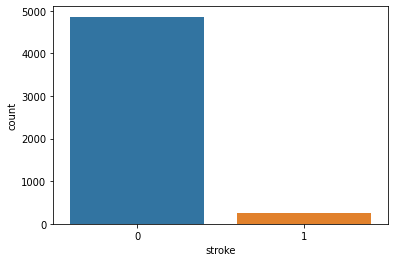

In [14]:
dfDistribuida = df.copy()
sns.countplot(data = dfDistribuida, x="stroke")
plt.show()

A continuación vamos a solucionar la mala distribución usando overSampler:

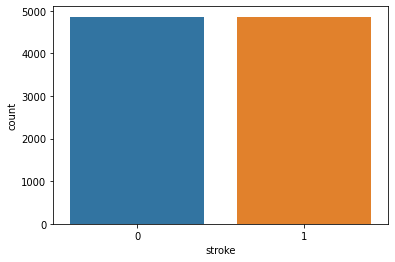

In [15]:

#distribucion del stroke
ros = oversampler(random_state=42)
X = dfDistribuida[["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type",
        "avg_glucose_level", "bmi", "smoking_status"]]
Y = dfDistribuida.stroke
X, Y = ros.fit_resample(X,Y)
dfDistribuida = X
dfDistribuida["stroke"] = Y

sns.countplot(data = dfDistribuida, x="stroke")
plt.show()


#### 3.4.3 Distribución de los datos
Una vez mejorada la distribución de los datos con respecto al atributo "stroke" procedemos a testear nuevamente nuestro árbol de decisión, para esto debemos participar nuevamente los conjuntos y reemplazar los valores nulos en "bmi".


In [19]:
df_train, df_test = train_test_split(dfDistribuida, test_size=0.2, random_state=42)

#en el conjunto de entrenamiento, cambiamos los valores null por la media
media = df_train['bmi'].median()
df_train['bmi'] = df_train['bmi'].replace(['N/A'], [media])
df_train['bmi'] = df_train['bmi'].fillna(media)

#Prueba con maximo niveles
ID3_tree = g02_l2_core.ID3_DecisionTree(df_train, None)
g02_l2_core.SaveId3Tree(f"G02_ID3_tree_{maxTreeLevels}.txt", ID3_tree)

predict = g02_l2_core.TestID3Tree(df_test, ID3_tree)
PrintMetrics(df_test['stroke'].values, predict)

Accuracy -> 0.8344473007712082
Precision -> 0.78125
Recall -> 0.9278350515463918
F1 -> 0.8482563619227144
Matriz de Confusión:
      1        0
 1    900      252      
 0    70       723      


Claramente, las métricas mejoraron mucho llegando a valores de Precision=78%, recall=92% y f1=84%. En la matriz de confusión podemos observar que estamos penalizando mucho con los Falsos positivos y pensamos que se debe al oversampler utilizado. 

### 3.5 Comparación con Sklearn

Como parte del análisis de nuestro algoritmo surge la necesidad de comparar nuestras métricas con las de otro algoritmo, en este caso sklean y su "DecisionTreeClassifier".

#### 3.5.1 Prueba con datos desbalanceados
La primera prueba que queremos hacer es con los mismos datos desbalanceados que probamos en nuestro algoritmo, por lo que probamos con los datos originales y haciendo una separación en conjuntos 80% - 20%.
Una diferencia con nuestro algoritmo es que sklear no soporta testear datos con el "bmi" en "N/A" por lo que para esta prueba decidimos reemplazar esos valores por la media.

In [24]:
#prueba con el algoritmo de sklearn
dfSkLearn = df.copy()
#sklearn no soporta nan, entonces como son pocos, optamos por ponerles tambien la media para estas pruebas
media = dfSkLearn['bmi'].median()
dfSkLearn['bmi'] = dfSkLearn['bmi'].replace(['N/A'], [media])
dfSkLearn['bmi'] = dfSkLearn['bmi'].fillna(media)

X = dfSkLearn[["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type",
        "avg_glucose_level", "bmi", "smoking_status"]]
Y = dfSkLearn.stroke
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt_clf = tree.DecisionTreeClassifier(criterion="entropy")
dt_clf = dt_clf.fit(X_train, Y_train)
Y_pred = dt_clf.predict(X_test)

PrintMetrics(Y_test, Y_pred)


Accuracy -> 0.898238747553816
Precision -> 0.125
Recall -> 0.11290322580645161
F1 -> 0.11864406779661016
Matriz de Confusión:
      1        0
 1    7        49       
 0    55       911      


Nuevamente, vemos métricas muy parecidas con nuestra solución, una Accurrency alta (89%) pero valores de Precision y Recall muy bajos.
<table>
<tr><th></th> <th>ID3 G02</th> <th>Sklearn</th></tr>
<tr><td>Accuracy</td> <td> 0.9315068493150684</td> <td>0.898238747553816</td></tr>
<tr><td>Precision</td> <td>0.21428571428571427</td> <td>0.125</td></tr>
<tr><td>Recall</td> <td>0.04838709677419355</td> <td>0.11290322580645161</td></tr>
<tr><td>F1</td> <td>0.07894736842105263</td> <td>0.11864406779661016</td></tr>
</table>

#### 3.5.2 Prueba con datos balanceados
La segunda prueba es con sklearn pero con la mejora en la distribución de los datos

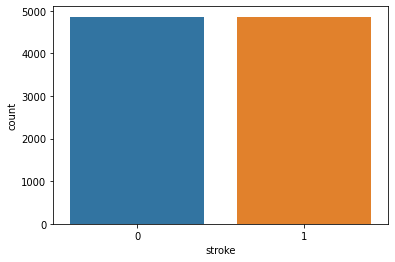

Accuracy -> 0.9840616966580977
Precision -> 0.9690309690309691
Recall -> 1.0
F1 -> 0.9842719431760528
Matriz de Confusión:
      1        0
 1    970      31       
 0    0        944      


In [25]:
#prueba con el algoritmo de sklearn
dfSkLearnDistribuida = df.copy()

ros = oversampler(random_state=42)
X, Y = ros.fit_resample(X,Y)
dfSkLearnDistribuida = X
dfSkLearnDistribuida["stroke"] = Y
sns.countplot(data = dfSkLearnDistribuida, x="stroke")
plt.show()

#sklearn no soporta nan, entonces como son pocos, optamos por ponerles tambien la media para estas pruebas
media = dfSkLearnDistribuida['bmi'].median()
dfSkLearnDistribuida['bmi'] = dfSkLearnDistribuida['bmi'].replace(['N/A'], [media])
dfSkLearnDistribuida['bmi'] = dfSkLearnDistribuida['bmi'].fillna(media)

X = dfSkLearnDistribuida[["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type",
        "avg_glucose_level", "bmi", "smoking_status"]]
Y = dfSkLearnDistribuida.stroke
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt_clf = tree.DecisionTreeClassifier(criterion="entropy")
dt_clf = dt_clf.fit(X_train, Y_train)
Y_pred = dt_clf.predict(X_test)
PrintMetrics(Y_test, Y_pred)


Como era de esperarse, las métricas mejoran, teniendo si valores mucho mejores que los de nuestra solución. Otro punto a destacar es que la métrica Recall está en 1, dando a sospechar de un posible sobreajuste, lo que indicaría que podría no ser tan buena esa solución retornada por sklearn.
<table>
<tr><th></th> <th>ID3 G02</th> <th>Sklearn</th></tr>
<tr><td>Accuracy</td> <td> 0.8344473007712082</td> <td>0.9840616966580977</td></tr>
<tr><td>Precision</td> <td>0.78125</td> <td>0.9690309690309691</td></tr>
<tr><td>Recall</td> <td>0.9278350515463918</td> <td>1.0</td></tr>
<tr><td>F1</td> <td>0.8482563619227144</td> <td>0.9842719431760528</td></tr>
</table>

## 4. Conclusión

Se llegó a una implementación del algoritmo ID3 que creemos fue buena, con tiempo de ejecución buenos y métricas que si bien son peores que sklearn, creemos que con mejoras sería posible acercanos un poco. 
Como es de esperarse para los árboles de decisión se requiere de un gran trabajo de preprocesamiento en los datos, ya que la creación del árbol va a depender mucho de la cantidad de ejemplos y su distribución.

Creemos que es posible una mejora en las métricas probando otras formas de ajustar la distribución de los ejemplos. También algo muy importante sería lograr obtener una cantidad más de casos positivos para el entrenamiento.